## Prepare data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import sys
sys.path.append('/content/gdrive/MyDrive/Intro_NLP/Code/OCR')

In [3]:
import post_processing
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

In [4]:
def post_processing_ocr(df):
    print("Process: Post processing classification results")
    
    bbox_df = []
    source_img_lst = df["source_img"].unique()
    sep_lst = []
    with tqdm(total = len(source_img_lst)) as pbar:
        for source_img in source_img_lst:
            img_df = df[df['source_img'] == source_img]
            listOfBBoxes = post_processing.createListOfBBoxes(img_df)
            listOfSortedBBoxes = post_processing.SortBBoxRTLAndTTB(listOfBBoxes)
            
            sorted_bbox_lst = []
            
            for bbox in listOfSortedBBoxes:
                sorted_bbox_lst.append(np.array([int(bbox.x1), int(bbox.y1), int(bbox.x2), int(bbox.y2), float(bbox.x_center), float(bbox.y_center)])) 
                bbox_df.append(np.array([bbox.label, bbox.conf_score, int(bbox.x1), int(bbox.y1), int(bbox.x2), int(bbox.y2), bbox.candidate_lst, bbox.score_cls_lst, source_img]))
            
            sorted_bbox_lst = np.array(sorted_bbox_lst)
            
            
            sep_img_lst = post_processing.SplitLine(sorted_bbox_lst, hyper_lambda=1.5)
            sep_lst.append(sep_img_lst)
            # post_processing.write_txt_file(listOfSortedBBoxes, sep_lst, source_img, config.RESULT_OCR_PATH)
            
            pbar.update()
    
    bbox_df = np.array(bbox_df)
    df = pd.DataFrame({
    "label": bbox_df[:, 0],
    "conf": bbox_df[:, 1],
    "x1": bbox_df[:, 2],
    "y1": bbox_df[:, 3],
    "x2": bbox_df[:, 4],
    "y2": bbox_df[:, 5],
    "candidate": bbox_df[:, 6],
    "score_cls": bbox_df[:, 7],
    "source_img": bbox_df[:, 8]
    }) 
    
    print("Process done!")
    
    return df, sep_lst

In [5]:
ocr_results_path = "/content/gdrive/MyDrive/Intro_NLP/Code/OCR/integrate LM to OCR demo/ocr_results_resnet101_augment_full_chars_350_0.1_annotation_top_3.pkl"
ocr_results_df = pd.read_pickle(ocr_results_path)
ocr_results_df

,label,conf,x1,y1,x2,y2,candidate,score_cls,source_img
0,7567,1.0,427,149,462,190,"[7567, 5BA2, 5BB9]","[0.99277425, 0.0019487272, 0.00056554994]",nlvnpf-0059-002.jpg
1,7169,1.0,426,192,464,227,"[7169, 7551, 2441D]","[0.48439947, 0.44746906, 0.020414026]",nlvnpf-0059-002.jpg
2,4021,1.0,425,226,462,262,"[4021, 23218, 27D51]","[0.9999025, 3.901338e-05, 1.2956386e-05]",nlvnpf-0059-002.jpg
3,50B3,1.0,426,261,463,302,"[50B3, 2102F, 4F8D]","[0.99990964, 2.0473859e-05, 7.0937235e-06]",nlvnpf-0059-002.jpg
4,897F,1.0,426,304,464,339,"[897F, 9854, 56DB]","[0.99948174, 5.173393e-05, 3.517358e-05]",nlvnpf-0059-002.jpg
...,...,...,...,...,...,...,...,...,...
14421,610F,1.0,291,524,325,560,"[610F, 7AE5, 7ADC]","[0.9997453, 6.688655e-05, 1.4094788e-05]",nlvnpf-0059-105.jpg
14422,42E6,1.0,292,558,327,592,"[42E6, 20CE8, 6D77]","[0.68379265, 0.28659162, 0.009173354]",nlvnpf-0059-105.jpg
14423,20CD2,1.0,288,591,324,625,"[20CD2, 215F6, 9678]","[0.9987721, 0.00070631946, 0.00012929484]",nlvnpf-0059-105.jpg
14424,9EBB,1.0,288,625,324,658,"[9EBB, 6797, 8109]","[0.9999833, 3.0489082e-06, 2.750081e-06]",nlvnpf-0059-105.jpg


In [6]:
sorted_df, sep_lst = post_processing_ocr(ocr_results_df)

Process: Post processing classification results


  0%|          | 0/104 [00:00<?, ?it/s]<ipython-input-4-6c603a0898d6>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bbox_df.append(np.array([bbox.label, bbox.conf_score, int(bbox.x1), int(bbox.y1), int(bbox.x2), int(bbox.y2), bbox.candidate_lst, bbox.score_cls_lst, source_img]))
100%|██████████| 104/104 [00:01<00:00, 85.18it/s]

Process done!


## Don't freak out, we just copied and modified this model from [pycorrector - macbert](https://github.com/shibing624/pycorrector/tree/master/pycorrector/macbert)

In [ ]:
!pip install loguru
!pip install pytorch_lightning
!pip install git+https://github.com/huggingface/transformers

In [8]:
sys.path.append('/content/gdrive/MyDrive/Intro_NLP/Code/OCR/macBERT')

In [9]:
import torch
import operator
from abc import ABC
import torch.nn as nn
from loguru import logger
import pytorch_lightning as pl
from collections import OrderedDict

from transformers import BertTokenizerFast, BertForMaskedLM
from tokenizers import BertWordPieceTokenizer

import lr_scheduler
from evaluate_util import compute_corrector_prf, compute_sentence_level_prf
from base_model import FocalLoss, make_optimizer, build_lr_scheduler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [10]:
folder_path="/content/gdrive/MyDrive/Intro_NLP/Code/OCR/data/macbert_ckpt"
ckpt_file=folder_path+"/epoch=104-val_loss=0.19-val_avg_f1=0.980.ckpt"
print(ckpt_file)

/content/gdrive/MyDrive/Intro_NLP/Code/OCR/data/macbert_ckpt/epoch=104-val_loss=0.19-val_avg_f1=0.980.ckpt


In [11]:
### Config params
class MODEL_class:
    BERT_CKPT= "hfl/chinese-macbert-base"
    DEVICE= "cuda"
    NAME= "macbert4csc"
    GPU_IDS= [0]
    HYPER_PARAMS= [0.3]
    WEIGHTS= ""

class DATASETS_class:
    TRAIN= ""
    VALID= ""
    TEST= ""

class SOLVER_class:
    BASE_LR= 0.00015
    WEIGHT_DECAY= 6e-5
    BATCH_SIZE= 128
    MAX_EPOCHS= 1000
    ACCUMULATE_GRAD_BATCHES= 4
    OPTIMIZER_NAME = "Adam"
    AMSGRAD = True,
    BIAS_LR_FACTOR = 2
    WEIGHT_DECAY_BIAS = 0
    SCHED = "WarmupExponentialLR"
    GAMMA = 0.9999
    STEPS = ()
    WARMUP_FACTOR = 0.005
    WARMUP_EPOCHS = 20
    WARMUP_METHOD = "linear"
    DELAY_ITERS = 0
    ETA_MIN_LR = 3e-7
    MAX_ITER = 100
    WARMUP_ITERS = 5
    INTERVAL = 'step'
    CHECKPOINT_PERIOD = 100
    LOG_PERIOD = 100

class CONFIG:
    MODEL = MODEL_class()
    DATASETS = DATASETS_class()
    SOLVER = SOLVER_class()
    OUTPUT_DIR= folder_path,
    MODE= ["train", "test"]

cfg = CONFIG()

In [12]:
### Base model
class BaseTrainingEngine(pl.LightningModule):
    def __init__(self, cfg, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.cfg = cfg

    def configure_optimizers(self):
        optimizer = make_optimizer(self.cfg, self)
        scheduler = build_lr_scheduler(self.cfg, optimizer)

        return [optimizer], [scheduler]

    def on_validation_epoch_start(self) -> None:
        logger.info('Valid.')

    def on_test_epoch_start(self) -> None:
        logger.info('Testing...')


class CscTrainingModel(BaseTrainingEngine, ABC):
    """
        BaseModel for CSC, defines training and prediction steps
        """

    def __init__(self, cfg, *args, **kwargs):
        super().__init__(cfg, *args, **kwargs)
        # loss weight
        self.w = cfg.MODEL.HYPER_PARAMS[0]

    def training_step(self, batch, batch_idx):
        ori_text, cor_text, det_labels = batch        
        outputs = self.forward(ori_text, cor_text, det_labels)
        loss = self.w * outputs[1] + (1 - self.w) * outputs[0]
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True, batch_size=len(ori_text))
        return loss

    def validation_step(self, batch, batch_idx):
        ori_text, cor_text, det_labels = batch
        outputs = self.forward(ori_text, cor_text, det_labels)
        loss = self.w * outputs[1] + (1 - self.w) * outputs[0]
        det_y_hat = (outputs[2] > 0.5).long()
        cor_y_hat = torch.argmax((outputs[3]), dim=-1)
        encoded_x = self.tokenizer(cor_text, padding=True, return_tensors='pt')
        encoded_x.to(self._device)
        cor_y = encoded_x['input_ids']
        cor_y_hat *= encoded_x['attention_mask']

        results = []
        det_acc_labels = []
        cor_acc_labels = []
        for src, tgt, predict, det_predict, det_label in zip(ori_text, cor_y, cor_y_hat, det_y_hat, det_labels):
            _src = self.tokenizer(src, add_special_tokens=False)['input_ids']
            _tgt = tgt[1:len(_src) + 1].cpu().numpy().tolist()
            _predict = predict[1:len(_src) + 1].cpu().numpy().tolist()
            cor_acc_labels.append(1 if operator.eq(_tgt, _predict) else 0)
            det_acc_labels.append(det_predict[1:len(_src) + 1].equal(det_label[1:len(_src) + 1]))
            results.append((_src, _tgt, _predict,))

        return loss.cpu().item(), det_acc_labels, cor_acc_labels, results

    def validation_epoch_end(self, outputs) -> None:
        det_acc_labels = []
        cor_acc_labels = []
        results = []
        for out in outputs:
            det_acc_labels += out[1]
            cor_acc_labels += out[2]
            results += out[3]
        loss = np.mean([out[0] for out in outputs])
        self.log('val_loss', loss)
        print(f'loss: {loss}')
        print(f'Detection: acc: {np.mean(det_acc_labels):.4f}')
        print(f'Correction: acc: {np.mean(cor_acc_labels):.4f}')
        dect_f1, cor_f1 = compute_corrector_prf(results, logger)
        
        _, _, _, senc_f1 = compute_sentence_level_prf(results, logger)
        self.log('val_avg_f1', (dect_f1+cor_f1+senc_f1)/3)
        print(f'val_avg_f1:', (dect_f1+cor_f1+senc_f1)/3)

    def test_step(self, batch, batch_idx):
        return self.validation_step(batch, batch_idx)

    def test_epoch_end(self, outputs) -> None:
        logger.info('Test.')
        self.validation_epoch_end(outputs)

    def predict(self, texts):
        inputs = self.tokenizer(texts, padding=True, return_tensors='pt')
        inputs.to(self.cfg.MODEL.DEVICE)
        with torch.no_grad():
            outputs = self.forward(texts)
            y_hat = torch.argmax(outputs[1], dim=-1)
            expand_text_lens = torch.sum(inputs['attention_mask'], dim=-1) - 1
        rst = []
        for t_len, _y_hat in zip(expand_text_lens, y_hat):
            rst.append(self.tokenizer.decode(_y_hat[1:t_len]).replace(' ', ''))
        return rst

    def score_candidate(self, texts, candidates_lst):
      inputs = self.tokenizer(texts, padding=True, return_tensors='pt')
      inputs.to(self.cfg.MODEL.DEVICE)
      with torch.no_grad():
          outputs = self.forward(texts)

      text_can_scores=[]
      for i in range(len(candidates_lst)):
        sentence_can_scores=[]
        for j in range(len(candidates_lst[i])):
          char_can_scores=[]
          for k in range(len(candidates_lst[i][j])):
            encoded_char = tokenizer.encode(candidates_lst[i][j][k])
            char_can_scores.append(outputs[1][i][j][encoded_char[1]].item())
          sentence_can_scores.append(char_can_scores)
        text_can_scores.append(sentence_can_scores)
      
      return text_can_scores


In [13]:
### MacBert model
class MacBert4Csc(CscTrainingModel, ABC):
    def __init__(self, cfg, tokenizer):
        super().__init__(cfg)
        self.bert = BertForMaskedLM.from_pretrained(cfg.MODEL.BERT_CKPT)
        self.detection = nn.Linear(self.bert.config.hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
        self.tokenizer = tokenizer

    def forward(self, texts, cor_labels=None, det_labels=None):
        if cor_labels:
            text_labels = self.tokenizer(cor_labels, padding=True, return_tensors='pt')['input_ids']
            text_labels[text_labels == 0] = -100  # -100 is ignored when calculating 
            text_labels = text_labels.to(self.device)
        else:
            text_labels = None


        encoded_text = self.tokenizer(texts, padding=True, return_tensors='pt')
        encoded_text.to(self.device)

        bert_outputs = self.bert(**encoded_text, labels=text_labels, return_dict=True, output_hidden_states=True)
        # error detection probability
        prob = self.detection(bert_outputs.hidden_states[-1])

        if text_labels is None:
            # error detection output, error correction output
            outputs = (prob, bert_outputs.logits)
        else:
            det_loss_fct = FocalLoss(num_labels=None, activation_type='sigmoid')
            # The pad part does not calculate the loss
            active_loss = encoded_text['attention_mask'].view(-1, prob.shape[1]) == 1
            active_probs = prob.view(-1, prob.shape[1])[active_loss]
            active_labels = det_labels[active_loss]
            det_loss = det_loss_fct(active_probs, active_labels.float())
            # Error detection loss, error correction loss, error detection output, error correction output
            outputs = (det_loss,
                       bert_outputs.loss,
                       self.sigmoid(prob).squeeze(-1),
                       bert_outputs.logits)
        return outputs

In [14]:
tokenizer = BertTokenizerFast.from_pretrained(cfg.OUTPUT_DIR[0])
model = MacBert4Csc(cfg, tokenizer)

logger.info(f'ckpt_path: {ckpt_file}')
if ckpt_file and os.path.exists(ckpt_file):
    model.load_state_dict(torch.load(ckpt_file)['state_dict'])
    # Save the original transformer bert model first
    tokenizer.save_pretrained(cfg.OUTPUT_DIR[0])
    bert = BertForMaskedLM.from_pretrained(cfg.MODEL.BERT_CKPT)
    bert.save_pretrained(cfg.OUTPUT_DIR[0])
    state_dict = torch.load(ckpt_file)['state_dict']
    new_state_dict = OrderedDict()
    if cfg.MODEL.NAME in ['macbert4csc']:
        for k, v in state_dict.items():
            if k.startswith('bert.'):
                new_state_dict[k[5:]] = v
    else:
        new_state_dict = state_dict
    # Save the model file after finetune training and replace the original pytorch_model.bin
    torch.save(new_state_dict, os.path.join(cfg.OUTPUT_DIR[0], 'pytorch_model.bin'))

Downloading:   0%|          | 0.00/659 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/412M [00:00<?, ?B/s]

Some weights of the model checkpoint at hfl/chinese-macbert-base were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
2023-01-10 04:09:36.423 | INFO     | __main__:<module>:4 - ckpt_path: /content/gdrive/MyDrive/Intro_NLP/Code/OCR/data/macbert_ckpt/epoch=104-val_loss=0.19-val_avg_f1=0.980.ckpt
Some weights of the model checkpoint at hfl/chinese-macbert-base were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This I

In [15]:
unk_tokens = [' ', '“', '”', '‘', '’', '\n', '…', '—', '\t', '֍']
def get_errors(corrected_text, origin_text):
    sub_details = []
    for i, ori_char in enumerate(origin_text):
        if i >= len(corrected_text):
            break
        if ori_char in unk_tokens:
            # deal with unk word
            corrected_text = corrected_text[:i] + ori_char + corrected_text[i:]
            continue
        if ori_char != corrected_text[i]:
            if ori_char.lower() == corrected_text[i]:
                # pass english upper char
                corrected_text = corrected_text[:i] + ori_char + corrected_text[i + 1:]
                continue
            sub_details.append((ori_char, corrected_text[i], i, i + 1))
    sub_details = sorted(sub_details, key=operator.itemgetter(2))
    return corrected_text, sub_details

    
class Inference:
    def __init__(self, ckpt_path=ckpt_file,
                 vocab_path=folder_path):
        logger.debug("device: {}".format(device))
        self.tokenizer = BertTokenizerFast.from_pretrained(vocab_path)
        
        self.model = MacBert4Csc.load_from_checkpoint(checkpoint_path=ckpt_path,
                                                          cfg=cfg,
                                                          map_location=device,
                                                          tokenizer=self.tokenizer)
        self.model.to(device)
        self.model.eval()

    def predict(self, sentence_list):
        """
        Text Error Correction Model Prediction
        Args:
            sentence_list: list
                input text list
        Returns: tuple
            corrected_texts(list)
        """
        is_str = False
        if isinstance(sentence_list, str):
            is_str = True
            sentence_list = [sentence_list]
        corrected_texts = self.model.predict(sentence_list)
        if is_str:
            return corrected_texts[0]
        return corrected_texts

    def predict_with_error_detail(self, sentence_list):
        """
        Text error correction model prediction, the result contains error location information
        Args:
            sentence_list: list
                input text list
        Returns: tuple
            corrected_texts(list), details(list)
        """
        details = []
        is_str = False
        if isinstance(sentence_list, str):
            is_str = True
            sentence_list = [sentence_list]
        corrected_texts = self.model.predict(sentence_list)

        for corrected_text, text in zip(corrected_texts, sentence_list):
            corrected_text, sub_details = get_errors(corrected_text, text)
            details.append(sub_details)
        if is_str:
            return corrected_texts[0], details[0]
        return corrected_texts, details

    def score_sentence_candidate(self, sentence_list, candidate_list):
        """
        Score of candidates of characters of sentences 
        Args:
            sentence_list: list
                input text list
        Returns: tuple
            corrected_texts(list)
        """
        is_str = False
        if isinstance(sentence_list, str):
            is_str = True
            sentence_list = [sentence_list]
            
        candidate_scores = self.model.score_candidate(sentence_list, candidate_list)

        return candidate_scores

In [16]:
m = Inference()

2023-01-10 04:10:31.610 | DEBUG    | __main__:__init__:24 - device: cuda
Some weights of the model checkpoint at hfl/chinese-macbert-base were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Combine classification scores and language model scores.



In [17]:
def decode_utf16_lst(candidate_lst):
  candidate_labels = []
  for candidate in candidate_lst:
    candidate_labels.append(chr(int(candidate, 16)))

  return candidate_labels

def append_sentence(img_df, sep_lst, idx_char):
  sentence = []
  candidate = []
  score = []

  while (idx_char < len(img_df) - 1) and (sep_lst[idx_char] == " "):
      sentence.append(img_df.iloc[idx_char]["label"])
      candidate.append(img_df.iloc[idx_char]["candidate"])
      score.append(img_df.iloc[idx_char]["score_cls"])
      idx_char += 1

  sentence.append(img_df.iloc[idx_char]["label"])
  candidate.append(img_df.iloc[idx_char]["candidate"])
  score.append(img_df.iloc[idx_char]["score_cls"])
  idx_char += 1

  return sentence, candidate, score, idx_char


In [18]:
def calculate_score(score_cls, score_mb, weight_lm = 0.2):
  return score_cls + weight_lm*score_mb 

In [19]:
def intergrate_LM(sorted_df):
  source_img_lst = sorted_df["source_img"].unique()
  all_text = []
  for idx_img, source_img in enumerate(source_img_lst):
    img_df = sorted_df[sorted_df['source_img'] == source_img].reset_index(drop = True)
    sentences_string = []
    cls_candidates_utf = []
    cls_scores = []
    idx_char = 0

    for _ in range(sep_lst[idx_img].count('\n')+1): 
      sentence, candidate, score, idx_char = append_sentence(img_df, sep_lst[idx_img], idx_char)
      sentences_string.append(''.join(decode_utf16_lst(sentence)))
      cls_candidates_utf.append(candidate)
      cls_scores.append([np.array(sscore).tolist() for sscore in score])

    # Prepare data
    text_candidate_lst = []
    num_sentences = len(cls_candidates_utf)
    for sen_idx in range(num_sentences):
      sentence_can_lst = []
      for word_idx in range(len(cls_candidates_utf[sen_idx])):
        cls_can = decode_utf16_lst(cls_candidates_utf[sen_idx][word_idx]) 
        sentence_can_lst.append(cls_can)
      text_candidate_lst.append(sentence_can_lst)

    # Feed to language model
    mb_scores = m.score_sentence_candidate(sentences_string, text_candidate_lst)
  
  # Get the candidate with the highest score for each character 
    text_chosen_can = []
    for i in range(len(text_candidate_lst)):
      sentence_chosen_can = []
      for j in range(len(text_candidate_lst[i])):
        # Normalize language model scores by sigmoid
        sigmoid_mbscores=[]
        for k in range(len(mb_scores[i][j])):
          sigmoid_mbscores.append(1/(1 + np.exp(-mb_scores[i][j][k])))

        # If classification score < 0.3, we do not let the macbert score affect the result
        id_chosen_can = 0
        if cls_scores[i][j][0] < 0.3:
          char_chosen_can = text_candidate_lst[i][j][0]
        else:
          # Get the chosen character and its id
          char_chosen_can = ''
          max_score = -1   
          for k in range(len(text_candidate_lst[i][j])):
            score = calculate_score(cls_scores[i][j][k], sigmoid_mbscores[k], 0.3)
            if score > max_score:
              max_score = score
              char_chosen_can = text_candidate_lst[i][j][k]
              id_chosen_can = k
        # If macbert score < 0.01, set chosen character is "UKN"
        if sigmoid_mbscores[id_chosen_can] < 0.01:
          char_chosen_can = "UKN"
        sentence_chosen_can.append(char_chosen_can)
      text_chosen_can.append(sentence_chosen_can)

    print(text_chosen_can)
    for i in range(len(text_candidate_lst)):
      print('\n sentence:', i)
      for j in range(len(text_candidate_lst[i])):
        print("candidates: ", text_candidate_lst[i][j])
        print("macbert score: ", mb_scores[i][j])
        sigmoid_mbscores=[]
        for k in range(len(mb_scores[i][j])):
          sigmoid_mbscores.append(1/(1 + np.exp(-mb_scores[i][j][k])))        
        print("sigmoid macbert score: ", sigmoid_mbscores)
        print("classification score: ", cls_scores[i][j])
        print("chosen character: ", text_chosen_can[i][j])

    all_text.append(text_chosen_can)
    break
  return all_text

intergrate_LM(sorted_df)

[['畧', '煩', '䀡', '傳', '西', '銘'], ['𡄎', '唭', '𠄩', '𡦂', '獸', '情', '要', '𠻗'], ['埃', '匕', '𠳺', '匕', '麻', '𦖑'], ['𡨺', '噒', '役', '畧', '苓', '𠽮', 'UKN', '𡢐'], ['𤳆', '辰', '忠', '孝', 'UKN', '頭'], ['𡛔', '辰', '節', '行', '兒', '句', '捞', '𨉓'], ['固', '𠊛', '扵', '郡', 'UKN', '城'], ['修', '低', '積', 'UKN', '疑', '生', '昆', '督'], ['達', '𠸜', '魂', '陸', '雲', '仙'], ['歲', '𣃣', '領', '糁', '藝', '專', '斈', '行'], ['饒', '柴', '𤍇', '史', '𥸷', '經'], ['𣎃', '㝵', '包', '當', '功', '程', '劳', '刀'], ['文', '它', '起', '鳳', '滕', '雲'], ['武', '添', '叁', 'UKN', '六', '韜', '埃', '皮']]

 sentence: 0
candidates:  ['畧', '客', '容']
macbert score:  [6.273849964141846, 1.4629006385803223, 3.2303309440612793]
sigmoid macbert score:  [0.998118588803734, 0.8119759190480835, 0.9619598650441643]
classification score:  [0.992774248123169, 0.0019487271783873439, 0.0005655499408021569]
chosen character:  畧
candidates:  ['煩', '畑', '𤐝']
macbert score:  [7.536498069763184, 10.199904441833496, 4.256750106811523]
sigmoid macbert score:  [0.9994670224151808, 0.9999628

[[['畧', '煩', '䀡', '傳', '西', '銘'],
  ['𡄎', '唭', '𠄩', '𡦂', '獸', '情', '要', '𠻗'],
  ['埃', '匕', '𠳺', '匕', '麻', '𦖑'],
  ['𡨺', '噒', '役', '畧', '苓', '𠽮', 'UKN', '𡢐'],
  ['𤳆', '辰', '忠', '孝', 'UKN', '頭'],
  ['𡛔', '辰', '節', '行', '兒', '句', '捞', '𨉓'],
  ['固', '𠊛', '扵', '郡', 'UKN', '城'],
  ['修', '低', '積', 'UKN', '疑', '生', '昆', '督'],
  ['達', '𠸜', '魂', '陸', '雲', '仙'],
  ['歲', '𣃣', '領', '糁', '藝', '專', '斈', '行'],
  ['饒', '柴', '𤍇', '史', '𥸷', '經'],
  ['𣎃', '㝵', '包', '當', '功', '程', '劳', '刀'],
  ['文', '它', '起', '鳳', '滕', '雲'],
  ['武', '添', '叁', 'UKN', '六', '韜', '埃', '皮']]]

Groundtruth:
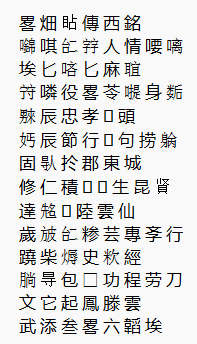